<a href="https://colab.research.google.com/github/HJ-Kurt-Su/model/blob/main/machine_learning_classification_train_Y221103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare: Install Package

In [1]:
#@markdown **Import Required Package**


import datetime

import pandas as pd
# from scipy import stats
import numpy as np
# import itertools
import datetime
# import plotly.express as px
# import plotly.graph_objects as go
# from IPython.display import display,HTML
from ipywidgets import widgets
import os


from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay




# from sklearn.tree import export_graphviz

# #@markdown **Mount Google Drive** & import package

# #@markdown !!Need Google Acount **Authority**
# mount_g_drive = False #@param {type:"boolean"}
# google_folder = "0710 Colab_Mount_x02" #@param{type: 'string'}

# if mount_g_drive == True:
#   from google.colab import drive
#   drive.mount('/content/drive')

#   folder_path = "drive/MyDrive/" + google_folder

#   if not os.path.isdir(folder_path):
#       os.mkdir(folder_path)


print("Import Module Done")
print(datetime.datetime.now())

Import Module Done
2022-11-16 03:30:54.317011


In [2]:
#@markdown **Select & Upload File**

from google.colab import files
uploaded = files.upload()

print("File Upload Done")
print(datetime.datetime.now())
# # files.download("finalized_model_knn.sav")

Saving Regression of type1 retention_clf.csv to Regression of type1 retention_clf.csv
File Upload Done
2022-11-16 03:31:04.381906


In [3]:
#@markdown ####**Input Data Settings:**

data_name = "Regression of type1 retention_clf.csv" #@param{type: 'string'}
# result_name = "hard_mount_df_Regression_20220708.csv" #@param{type: 'string'}
# data_by_g_drive = False #@param {type:"boolean"}
encoding = "utf-8" #@param{type: 'string'}


# steps =  250#@param [25,50,100,150,250,500,1000]{type: 'raw', allow-input: false}
# width_height = [512, 256]#@param{type: 'raw'}
# clip_guidance_scale = 5000 #@param{type: 'number'}
# tv_scale =  0#@param{type: 'number'}
# range_scale =   150#@param{type: 'number'}
# sat_scale =   0#@param{type: 'number'}
# cutn_batches = 4  #@param{type: 'number'}
# skip_augs = False#@param{type: 'boolean'}

# encoding = "utf-8"

# if data_by_g_drive == True:
#   load_path = folder_path + "/" + data_name
#   try:
#     df = pd.read_csv(load_path, encoding=encoding)
#   except FileNotFoundError:
#     print("No this file in Google Drive, Please upload!")
# else:
#   try:
#     df = pd.read_csv(data_name, encoding=encoding)
#   except FileNotFoundError:
#     print("No this file in Colab, Please upload!")

try:
  df_raw = pd.read_csv(data_name, encoding=encoding)
except FileNotFoundError:
  print("No this file in Colab, Please upload!")

cell_rename = False
exit_test_set = False
print(datetime.datetime.now())
print("Datasize: ", df_raw.shape)
df_raw.head()
# print(df.columns)

2022-11-16 03:31:11.574652
Datasize:  (168, 11)


,mass,spring,L8,L7,L4,L5,L9,L10,Result,ResultCLF,ResultLN
0,0.000187,64.993514,3.770880,14.240362,2.932061,3.951202,13.220880,0.048354,0.364761,0,-1.008512
1,0.000523,95.475882,4.265280,12.232493,2.887516,4.467207,13.715280,0.060281,0.546805,0,-0.603663
2,0.000317,79.472638,5.550720,10.342994,3.506761,4.191498,15.000720,0.139334,0.598321,0,-0.513628
3,0.000432,81.758816,7.132800,10.618453,3.181483,5.053310,16.582800,0.294083,0.705885,0,-0.348303
4,0.000097,96.542764,8.299584,11.227812,4.057285,3.972161,17.749584,0.264115,0.706400,0,-0.347574


In [ ]:
#@markdown ##**Optional**
#@markdown ####**Reset Parameter:** Run While Required
cell_rename = False
exit_test_set = False
tune_model = False
print(datetime.datetime.now())
print("Reset Done!")

2022-11-13 14:32:50.933573
Reset Done!


In [ ]:
#@markdown ##**Optional** 
#@markdown ####**Data Cell Rename: Multiple Columns**

#@markdown ####**Note:** List Q'ty must to mapping

#@markdown ####**Rule:** [ColumnA, ColumnB]
change_col_name = ["Tray_Sled", "Glue", "Connectorposition"] #@param{type: 'raw'}
#@markdown ####**Rule:** 
#@markdown [{ColumnA_origin_01: ColumnA_new_01, ColumnA_origin_02: ColumnA_new_02,},
#@markdown {ColumnB_origin_01: ColumnB_new_01, ColumnB_origin_02: ColumnB_new_02,}]
change_item = [{"Tray":0, "Sled": 1}, {"N": 0, "Y": 1}, {"N-Sym": 0, "Sym": 1}]  #@param{type: 'raw'}
# new_name = ["0", "1"]  #@param{type: 'raw'}

df = df_raw.copy()
location = 0
for i in change_col_name:
  # print(i)
  
  change_dict = change_item[location]
  # print(change_dict)

  df[i] = df[i].map(change_dict)
  print(i, ": ", df[i].unique())
  location+=1
cell_rename = True
print(datetime.datetime.now())
print("Done!!")
df.head()

Tray_Sled :  [1 0]
Glue :  [0 1]
Connectorposition :  [0 1]
2022-11-13 14:34:33.684408
Done!!


,Project,Result,ModuleWeight,SideWall_T,Tray_Sled,Module_T,GPInQ,TpinQ,Connectorposition,Glue,Screw
0,Cosmos,1,4.7,1.1378,1,0.8,0.0612,0.0,0,0,0
1,Cosmos,0,4.7,1.1378,1,0.8,0.0612,0.0,0,1,0
2,Roadster,1,5.0,1.1378,1,0.8,0.0612,0.0,0,0,0
3,Roadster,0,5.0,1.1378,1,0.8,0.0612,0.0,0,1,0
4,Steeda,0,5.0,1.1378,1,0.8,0.0612,0.0,0,1,0


In [4]:
#@markdown ####Choose Y column
if cell_rename == False:
  df = df_raw.copy()
dropdown_list = list(df.columns)
# dropdown_list.append("None")

# dropdown_x_var = widgets.Dropdown(options =dropdown_list)
dropdown_y_var = widgets.Dropdown(options =dropdown_list)
# dropdown_cate = widgets.Dropdown(options =dropdown_list)

print("Select Y Variable")
display(dropdown_y_var)
print("--------------------")

Select Y Variable


Dropdown(options=('mass', 'spring', 'L8', 'L7', 'L4', 'L5', 'L9', 'L10', 'Result', 'ResultCLF', 'ResultLN'), v…

--------------------


In [5]:
#@markdown ##**Optional** 
#@markdown ####**Add Test Data:** split to train & test set
test_set = "Spilit By Original" #@param ["Load By File", "Spilit By Original"]

#@markdown ####**Train Set Ratio Name:** workable while "test_set" = "Spilit By Original"
slice_ratio = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}

#@markdown ####**Test Set File Name:** workable while "test_set" = "Load By File"
test_data_name = "Regression of type1 retention_clf.csv" #@param{type: 'string'}

if test_set == "Spilit By Original":
  df_train = df.sample(frac=slice_ratio)

  df_test = df.drop(df_train.index)
  df_train = df_train.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

elif test_set == "Load By File":
  df_train = df.copy()
  df_test = pd.read_csv(test_data_name, encoding=encoding)

# print(df.shape)
print(" "*10)
print("*"*10)
print("Train Set Size: ", df_train.shape)
print("Test Set Size: ", df_test.shape)
print("*"*10)
print(" "*10)

exit_test_set=True

df_test.head()
# df.head()


          
**********
Train Set Size:  (118, 11)
Test Set Size:  (50, 11)
**********
          


,mass,spring,L8,L7,L4,L5,L9,L10,Result,ResultCLF,ResultLN
0,0.000317,79.472638,5.550720,10.342994,3.506761,4.191498,15.000720,0.139334,0.598321,0,-0.513628
1,0.000351,89.684232,3.553345,10.435312,3.163963,6.869352,13.003345,0.174883,2.439482,0,0.891786
2,0.000351,89.684232,3.553345,10.435312,3.163963,6.869352,13.003345,0.174883,2.439482,0,0.891786
3,0.000074,57.982569,5.511168,11.175140,2.716553,4.057800,14.961168,0.064627,2.447655,0,0.895130
4,0.000487,89.989055,2.940288,14.937198,3.250704,6.356599,12.390288,0.143734,2.513884,0,0.921829


In [6]:

#@markdown #####**Focus**: column name for pair plot. set None for all column
# cell_rename = True #@param{type: 'boolean'}
#@markdown Ex: None or ["A", "B", "C"]. A, B, C is factor name
x_variable = ["mass", "spring", "L8", "L7", "L4", "L5", "L9", "L10"] #@param{type: 'raw'}
# x_var_list = list(set(x_variable))
# print(x_variable)
# x_variable

if exit_test_set == True:
  df_x_train = df_train[x_variable].copy()
  df_x_test = df_test[x_variable].copy()
  y_train = df_train[dropdown_y_var.value].copy()
  y_test = df_test[dropdown_y_var.value].copy()
  print(" "*10)
  print("*"*10)
  print("Train & Test Set Done!")
  print(" "*10)

else:
  df_x_train = df[x_variable].copy()
  # df_x_test = df_test[x_variable].copy()
  y_train = df[dropdown_y_var.value].copy()
  print(" "*10)
  print("*"*10)
  print("Train Set Done Only!")
  print(" "*10)

# df_x = df[x_variable]
# df_x_mod = df_x.copy()
df_x_train.head()

          
**********
Train & Test Set Done!
          


,mass,spring,L8,L7,L4,L5,L9,L10
0,0.000408,93.189704,2.683201,11.966712,3.637643,6.445400,12.133201,0.255377
1,0.000130,16.221725,2.979840,14.105052,4.041154,4.516710,12.429840,0.125074
2,0.000302,67.279691,5.352960,14.506142,3.860966,5.347357,14.802960,0.145619
3,0.000197,41.369678,8.022720,17.064930,3.255924,7.700629,17.472720,0.150831
4,0.000254,90.141467,8.813760,17.197820,2.879893,5.565880,18.263760,0.185644


In [7]:
#@markdown ###**Train Model:**

model_selection = 'Support Vector Classifier' #@param ["Support Vector Classifier", "KNeighborsClassifier", "XGBClassifier", "GaussianProcessClassifier", "RandomForestClassifier", "DecisionTreeClassifier"]
x_feature_scaling = True #@param {type:"boolean"}
y_feature_scaling = False #@param {type:"boolean"}
tune_model = False
#@markdown #####SVM Parameter
kernel_selection = 'rbf' #@param ["linear", "poly", "rbf"]

#@markdown #####KNeighborsRegressor Parameter
neighbors = 5 #@param {type:"integer"}

#@markdown #####Decision Tree/Random Forest Parameter

# #@markdown ####**Train Decision Tree Model:**

max_tree_depth = 4 #@param {type:"slider", min:1, max:10, step:1}
#@markdown ####**Ex: [0, 1] vs. ["Fail", "Pass"]**
class_naming = ["Fail", "Pass"] #@param{type: 'raw'}

# # print(dropdown_y_var)
# y = df[dropdown_y_var.value].copy()

import joblib
from google.colab import files

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


if x_feature_scaling == True:
  df_x_train_sc = sc.fit_transform(df_x_train)
  if exit_test_set == True:
    df_x_test_sc = sc.fit_transform(df_x_test)
else:
  df_x_train_sc = df_x_train.copy()
  if exit_test_set == True:
    df_x_test_sc = df_x_test.copy()

if y_feature_scaling == True:
  y_train_sc = sc.fit_transform(y_train)
  if exit_test_set == True:
    y_test_sc = sc.fit_transform(y_test)
else:
  y_train_sc = y_train.copy()
  if exit_test_set == True:
    y_test_sc = y_test.copy()



if model_selection == 'Support Vector Classifier':
  from sklearn.svm import SVC
  clf_model = SVC(kernel = kernel_selection, gamma=2)

elif model_selection == "KNeighborsClassifier":
  from sklearn.neighbors import KNeighborsClassifier
  clf_model = KNeighborsClassifier(n_neighbors = neighbors, metric = 'minkowski', p = 3, leaf_size=50)

if model_selection == 'XGBClassifier':
  from xgboost import XGBClassifier
  clf_model = XGBClassifier()


elif model_selection == 'GaussianProcessClassifier':
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.gaussian_process.kernels import RBF
  kernel = 1.0 * RBF(1.0)
  clf_model = GaussianProcessClassifier(kernel=kernel,
          random_state=0)



elif model_selection == 'RandomForestClassifier':
  from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
  clf_model = RandomForestClassifier(random_state=0, max_depth=max_tree_depth)


elif model_selection == 'DecisionTreeClassifier':
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import tree
  import graphviz
  from sklearn.tree import export_graphviz
  clf_model = DecisionTreeClassifier(random_state=0, max_depth=max_tree_depth)




clf_model.fit(df_x_train_sc, y_train_sc)

if model_selection == 'DecisionTreeClassifier':
  g = export_graphviz(
      clf_model,
      feature_names=df_x_train.columns,
      class_names=class_naming,
      filled=True,
      special_characters=True,
      # out_file=("moons_tree.dot")
            )
  graph = graphviz.Source(g)
  display(graph)



print(" "*10)
print("*"*10)
print("Model Parameter:", model_selection)
clf_model.get_params(deep=True)

          
**********
Model Parameter: Support Vector Classifier


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 2,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
#@markdown ##**Optional** 
#@markdown ####**Optimize Model**
## @markdown ####**Decision Tree Figure Name**
# fig_naming = "test_model" #@param{type: 'string'}

from sklearn.model_selection import RandomizedSearchCV


if exit_test_set == True:
  x = df_x_test_sc
  y = y_test_sc
else:
  x = df_x_train_sc
  y = y_train_sc


n_iter_search = 20

if model_selection == 'XGBClassifier':
  param_grid = {
          'silent': [False],
          'max_depth': [3, 6, 10, 15, 20],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
          'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
          'gamma': [0, 0.25, 0.5, 1.0],
          'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
          'n_estimators': [100]}
  fit_params = {#'eval_metric': 'mlogloss',
          'early_stopping_rounds': 10,
          'eval_set': [(x, y)],
          'verbose': 0}
  rs = RandomizedSearchCV(clf_model, param_grid, n_iter=n_iter_search,
                n_jobs=1, verbose=2, cv=2,
                scoring='neg_log_loss', refit=True, random_state=42)

  rs.fit(df_x_train_sc, y_train_sc, **fit_params)


# elif model_selection == 'Support Vector Classifier':
#   C_range = np.logspace(-10, 10, 21)
#   gamma_range = np.logspace(-10, 10, 21)
#   param_grid = { 
#     # Regularization parameter.
#     "C": C_range,
#     # Kernel type
#     "kernel": ['rbf', 'poly'],
#     # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#     "gamma": gamma_range.tolist()+['scale', 'auto']
#     }
#   # Set up score
#   scoring = ['accuracy']
#   # Set up the k-fold cross-validation
#   # kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
#   # Define random search
#   # random_search = RandomizedSearchCV(estimator=svc, 
#   #                     param_distributions=param_grid, 
#   #                     n_iter=20,
#   #                     scoring=scoring, 
#   #                     refit='accuracy', 
#   #                     n_jobs=-1, 
#   #                     cv=2,
#   #                     # cv=kfold, 
#   #                     verbose=0)
#   # Fit grid search
#   rs = RandomizedSearchCV(clf_model, param_distributions=param_grid,
#                 n_iter=n_iter_search,
#                 scoring=scoring, 
#                 refit='accuracy', 
#                 n_jobs=-1, 
#                 cv=2,
#                 # cv=kfold, 
#                 verbose=0
#                 )
#   rs.fit(df_x_train_sc, y_train_sc)
#   # Print grid search summary
#   # random_result


elif model_selection == 'RandomForestClassifier':
  from scipy.stats import randint as sp_randint
  # build a classifier
  # clf = RandomForestClassifier(n_estimators=100)
  # specify parameters and distributions to sample from
  param_dist = {"max_depth": [3, None],
                "max_features": sp_randint(1, 11),
                "min_samples_split": sp_randint(2, 11),
                "min_samples_leaf": sp_randint(1, 11),
                "bootstrap": [True, False],
                "criterion": ["gini", "entropy"]}
  # run randomized search
  
  rs = RandomizedSearchCV(clf_model, param_distributions=param_dist,
                n_iter=n_iter_search)
  rs.fit(df_x_train_sc, y_train_sc)


elif model_selection == 'DecisionTreeClassifier':
  from scipy.stats import randint as sp_randint
  # build a classifier
  # clf = RandomForestClassifier(n_estimators=100)
  # specify parameters and distributions to sample from
  param_dist = {
      "max_depth": range(1,10),
      "max_features": sp_randint(1, 11),
      "min_samples_split": sp_randint(2, 11),
      "min_samples_leaf": sp_randint(1, 11),
      # "bootstrap": [True, False],
      "criterion": ["gini", "entropy"]
      }
  # run randomized search
  n_iter_search = 20
  rs = RandomizedSearchCV(clf_model, param_distributions=param_dist,
                n_iter=n_iter_search)
  rs.fit(df_x_train_sc, y_train_sc)


  # figure_save_name = fig_naming+".dot"
  export_graphviz( 
  rs.best_estimator_,
  out_file=("decision_tree_demo.dot"),
  feature_names=df_x_train.columns,
  class_names=class_naming,
  filled=True,
  ) 

  g_opt = export_graphviz(
    rs.best_estimator_,
    feature_names=df_x_train.columns,
    class_names=class_naming,
    filled=True,
    special_characters=True,
    # out_file=("moons_tree.dot")
          )
  graph_opt = graphviz.Source(g_opt)
  display(graph_opt)
  !dot -Tpng decision_tree_demo.dot -o decision_tree_demo.png

tune_model = True
print(" "*10)
print("*"*10)
print("Best Model Parameter:", model_selection)
# print(rs.best_params_)
rs.best_estimator_
# g=str(rs.best_estimator_).split("(")[1][:-1]
# g



     
train set
**********
Accurary Score:  0.9491525423728814
     
**********
AUC:  0.85
Thresholds: 
[2 1 0]
FPR: 
[0. 0. 1.]
TPR: 
[0.  0.7 1. ]
     


,P_Value
spring,1.080048e-12
L5,3.903634e-01
L7,6.257637e-01
L10,7.115546e-01
L8,7.306311e-01
L9,7.306311e-01
mass,8.674410e-01
L4,9.017391e-01


     
**********


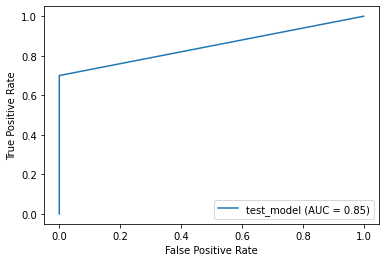

     
test set
**********
Accurary Score:  0.72
     
**********
AUC:  0.4864864864864865
Thresholds: 
[2 1 0]
FPR: 
[0.         0.02702703 1.        ]
TPR: 
[0. 0. 1.]
     
     
**********


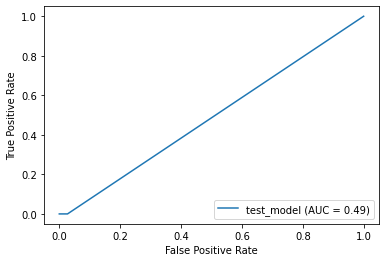

In [8]:
#@markdown ####**Model Socre**
model_naming = "test_model" #@param{type: 'string'}


from sklearn.feature_selection import f_classif

if tune_model == True:
  # clf_model = XGBClassifier(**rs.best_params_)
  clf_model = rs.best_estimator_
  clf_model.fit(df_x_train_sc, y_train_sc)



if exit_test_set == True:
  data_list = ["train set", "test set"]
else:
  data_list = ["train set"]


for j in data_list:
  if j == "train set":
    
    x_input = df_x_train_sc.copy()
    y = y_train_sc.copy()
  else:
    x_input = df_x_test_sc.copy()
    y = y_test_sc.copy()
    # if x_feature_scaling == True:
    #   df_x_test_sc = sc.fit_transform(df_x_test)
    # else:
    #   y = y_test
    # x_input = df_x_test_sc.copy()
    # y = y_test

  prediction = clf_model.predict(x_input)

  accu_score = accuracy_score(prediction, y)
  print("     ")
  print(j)
  print("**********")
  print("Accurary Score: ", accu_score)

  auc_score = roc_auc_score(y, prediction)
  fpr, tpr, thresholds = metrics.roc_curve(y, prediction, pos_label=1)
  print("     ")
  print("**********")
  print("AUC: ", auc_score)
  print("Thresholds: ")
  print(thresholds)
  print("FPR: ")
  print(fpr)
  print("TPR: ")
  print(tpr)
  print("     ")
# yhat2 = model.predict(df_reg_train_2)
# print(result.summary())
# RocCurveDisplay.from_estimator()
  if j == "train set":
    df_summary = pd.DataFrame()
    factor_importance_model = ['DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']
    if model_selection in factor_importance_model:
    # if model_selection == 'DecisionTreeClassifier' or model_selection == 'RandomForestClassifier' or model_selection == 'XGBClassifier':
      factor_importance = pd.Series(clf_model.feature_importances_, index=x_variable).sort_values(ascending=False)
      print("     ")
      print("**********")
      # print(factor_importance)
      # print("     ")
      df_summary["Importance"] = factor_importance
    
    p_values = pd.Series(f_classif(x_input, y)[1], index=x_variable)
    df_summary["P_Value"] = p_values
    display(df_summary.sort_values(by='P_Value', ascending=True))

  roc_auc = metrics.auc(fpr, tpr)
  display_auc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_naming)
  display_auc.plot()
  print("     ")
  print("**********")
  plt.show()

# print("     ")
# print("**********")
# print("Model Parameter")
# clf_model.get_params(deep=True)

In [ ]:
import joblib
from google.colab import files

filename = 'xgboost_trial' #@param{type: 'string'}

save_file = filename+".sav"
download_model = True #@param {type:"boolean"}
joblib.dump(clf_model, save_file)

if download_model == True:
  files.download(save_file)

print(datetime.datetime.now())
print("Done!!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2022-11-13 15:13:12.122944
Done!!


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# build a classifier
clf = RandomForestClassifier(n_estimators=100)
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# run randomized search
n_iter_search = 20
rs = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
rs.fit(*train)